# Chromosome 19 bacmapping

This jupyter notebook contains an examples on how to use some bacmapping functions for chromosome 19. 

In [1]:
import bacmapping as bmap
import matplotlib as plt
import os
from Bio import Entrez

## An example dataset
The following commands are used on the example dataset provided here, containing only the details and sequence for chromosome 19 of the RP11 BACs, for the sake of size. This will still take a few minutes.
-   Instead of running getNewClones, which would download all the material, create an empty folder and place the folders details and sequence inside
-   Run the following commands from inside the folder

To begin, this code will download the sequence required to run the code, this is not part of the example, we just need some sequence!

In [ ]:
email = "example@website.com" # Remember to give NIH your email!

acc = 'NC_000019.10' # this is the name of the file we'll be downloading, chromosome 19 from the human genome
wd = os.getcwd() # get current directory
seqdir = os.path.join(wd , 'sequences' ) #making the directory to save this in
os.makedirs(seqdir) #making the directory to save this in
fpath = os.path.join(seqdir,  acc + '.fasta') #the path to save our new sequence in
Entrez.email = email # You are required to provide an email
net_handle = Entrez.efetch(db="nucleotide", id=acc, rettype="fasta", retmode="text") #This does the heavy lifting, using Biopython to access and download the single file
out_handle = open(fpath, "w") #opening a new path to write the file into
out_handle.write(net_handle.read()) # writing the new sequence file
out_handle.close()
net_handle.close() # close everything out

Map the BACs provided in the example dataset by running mapPlacedClones

In [ ]:
bmap.mapPlacedClones(cpustouse=8, chunk_size=1000)

The statistics on this dataset can be determined by running the following commands, which are detailed below in the "Functions for statistics" section, they'll save 4 csv files with the results of this analysis

In [ ]:
bmap.countPlacedBACs()
bmap.getCoverage()
bmap.getAverageLength()
bmap.getSequencedClonesStats()

To create a library of BAC pairs which are linearized to produce overlapping ends. We'll set longestoverlap, the longest acceptable overlap in the overlapping end, to 500 and shortestoverlap, the shorted acceptable overlap, to 0. This means that we'll also include BACs which are linearized at the same site. This code will produce a file in pairs detailing all the possible pairs.

In [ ]:
bmap.makePairs(cpustouse=8,longestoverlap=500,shortestoverlap=0)

Finally, let's explore one set of maps produced in the library, we'll return all the maps for one BAC which is included in the library and then get an image of the produced map.

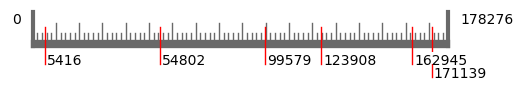

In [3]:
name = 'RP11-1055H23'
enzyme = 'FspI'
maps = bmap.getMaps(name)
print(maps)
rmap = bmap.getRestrictionMap(name,enzyme)
print(rmap)
plt = bmap.drawMap(name, enzyme)
plt.show()

-   maps from bmap.getMaps(name) is a series of all the restriction maps for RP11-1055H23
-   rmap from bmap.getRestrictionMap(name,enzyme) is just the cut locations of FspI in RP11-1055H23
-   plt is a visual representation of rmap